In [1]:
import requests
import pandas as pd
from lib_func import save_text_from_url
from io import StringIO

#Daily releases
url = 'https://www-app3.gfz-potsdam.de/kp_index/Kp_ap_Ap_SN_F107_since_1932.txt'
#File name
filename = 'solar.txt'

save_text_from_url(url, filename)
f = open('solar.txt', 'r')
data = f.read()
data_lines = data.split('\n')

instructions = data_lines[:39]
solar_data = data_lines[39:-1]
full_txt_data = ''
for l in solar_data:
    full_txt_data += l + "\n"
df = pd.read_csv(StringIO(full_txt_data), sep='\s+')
df['max_Kp'] = df[['Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8']].max(axis=1)
df.to_csv('historical_forecast.csv')

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dviab\AppData\Local\Temp\ipykernel_22592\1745217064.py:21: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(full_txt_data), sep='\s+')


File saved as 'solar.txt'


In [15]:
idx_new = []
idx_new = idx_new + (list(range(1,5)))
idx_new

[1, 2, 3, 4]

In [20]:
idx[:14]

[1942,
 2208,
 2213,
 2216,
 2217,
 2297,
 2322,
 2670,
 3005,
 3006,
 3010,
 3011,
 3012,
 3098]

In [32]:
idx = df.loc[df.max_Kp>8].index.to_list()
idx_new = []
for id in idx:
    idx_new = idx_new + list(range(id, id + 8))
df.iloc[idx_new[:-7]]

#YYY  MM  DD   days   days_m   Bsr  dB    Kp1    Kp2    Kp3  ...  ap5  \
1942   1937   4  26   1942   1942.5  1424   8  5.667  4.667  3.333  ...    7   
1943   1937   4  27   1943   1943.5  1424   9  7.000  6.000  4.000  ...    7   
1944   1937   4  28   1944   1944.5  1424  10  7.000  8.000  8.000  ...  111   
1945   1937   4  29   1945   1945.5  1424  11  2.333  2.000  3.667  ...   22   
1946   1937   4  30   1946   1946.5  1424  12  3.333  4.000  3.333  ...   18   
...     ...  ..  ..    ...      ...   ...  ..    ...    ...    ...  ...  ...   
33738  2024   5  15  33738  33738.5  2601  25  1.333  2.000  2.333  ...    7   
33739  2024   5  16  33739  33739.5  2601  26  2.667  3.000  6.000  ...   32   
33740  2024   5  17  33740  33740.5  2601  27  1.333  2.333  1.333  ...   22   
33741  2024   5  18  33741  33741.5  2602   1  4.000  3.333  2.333  ...    7   
33886  2024  10  10  33886  33886.5  2607  11  2.333  2.667  2.000  ...   32   

       ap6  ap7  ap8   Ap   SN  F10.7obs  F10.7adj  D  max_Kp  
1942    48  111  236   67  262      -1.0      -1.0  2   8.333  
1943     6   94  132   61  268      -1.0      -1.0  2   7.000  
1944   111   48   56  128  248      -1.0      -1.0  2   8.000  
1945    22   27   22   19  205      -1.0      -1.0  2   4.000  
1946    15   22   22   21  157      -1.0      -1.0  2   4.000  
...    ...  ...  ...  ...  ...       ...       ... ..     ...  
33738    7   15    9    9  210     216.0     220.8  1   3.000  
33739   15    9    4   27  211     207.2     211.9  1   6.000  
33740   56   80   56   30  200     204.1     208.7  1   6.000  
33741    7    5    4   12  179     194.3     198.8  1   4.000  
33886  179  236  300   98  141     216.3     215.6  0   8.667  

[1313 rows x 29 columns]

<Axes: xlabel='#YYY'>

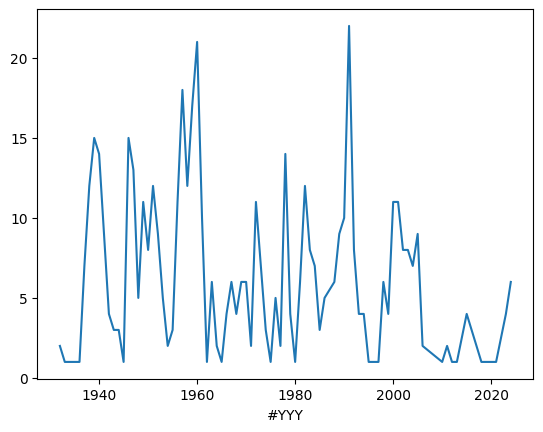

In [12]:
dflimit = df.loc[df.max_Kp>7]
(dflimit.groupby('#YYY')['max_Kp'].count()).plot()